In [1]:
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
import benchmark_utils as utils
import warnings
from utils import *
from matplotlib.pyplot import *
from pathlib import Path, PurePath
from nilearn import image, plotting
from nilearn.input_data import NiftiMasker, NiftiLabelsMasker
from nilearn.glm.first_level import FirstLevelModel
from load_confounds import Params9
from sklearn.model_selection import KFold
from nilearn.decoding import Decoder
from IPython.display import Markdown, display

### Results per session/per task:

**Task: wm**

0-Back_Body 0.9
0-Back_Face 0.9
0-Back_Place 0.8933333333333333
0-Back_Tools 0.8666666666666668
2-Back_Body 0.8933333333333333
2-Back_Face 0.8533333333333333
2-Back_Place 0.8333333333333334
2-Back_Tools 0.82
Cue_nan 0.9
countdown_nan 0.96
mean value: 0.882 



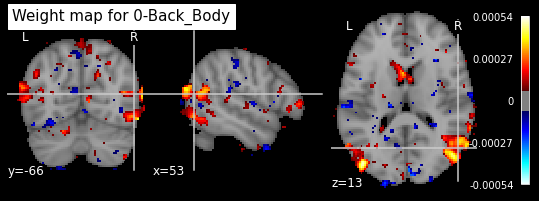

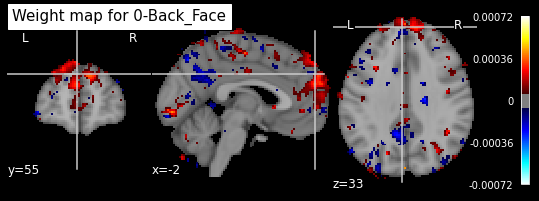

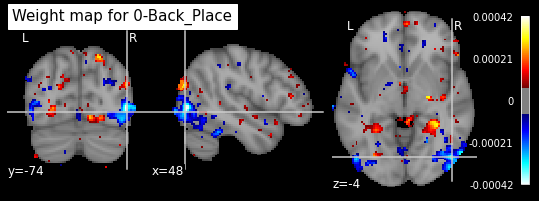

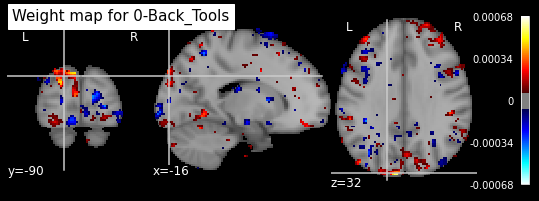

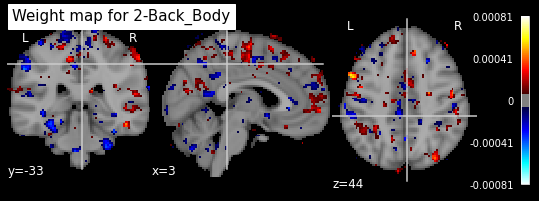

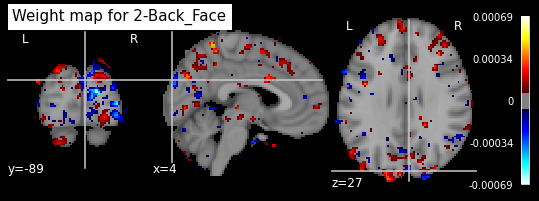

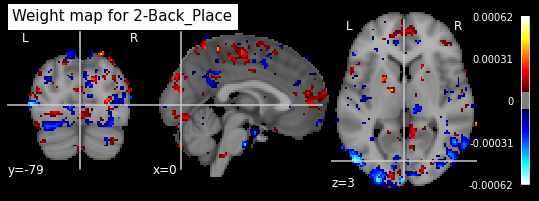

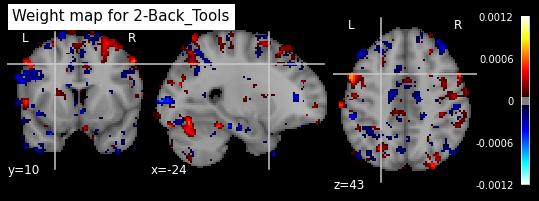

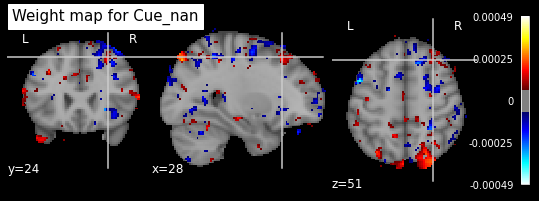

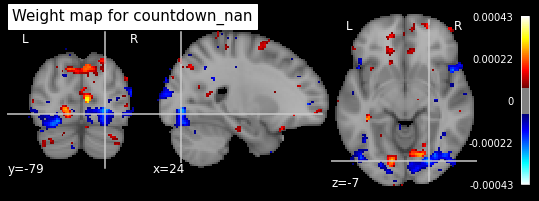

**Task: motor**

countdown 0.9388888888888889
cross_fixation 0.9666666666666666
new_bloc_left_foot 0.9111111111111111
new_bloc_left_hand 0.9055555555555556
new_bloc_right_foot 0.9166666666666666
new_bloc_right_hand 0.9666666666666668
new_bloc_tongue 0.9444444444444444
response_left_foot 0.961111111111111
response_left_hand 0.8777777777777779
response_right_foot 0.9333333333333332
response_right_hand 0.8944444444444445
response_tongue 0.8555555555555557
mean value: 0.9226851851851853 



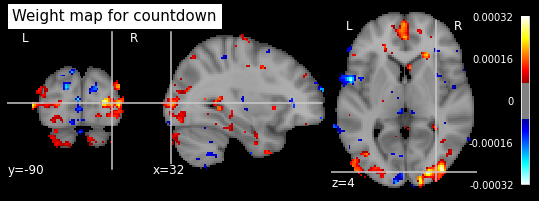

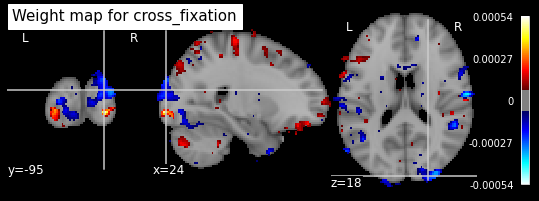

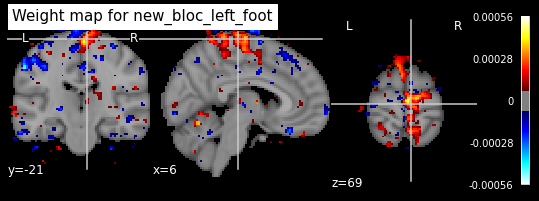

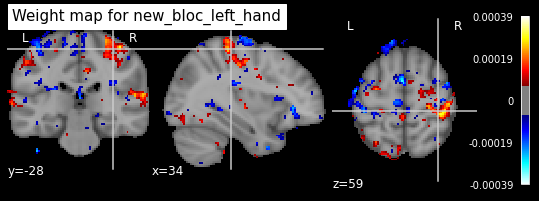

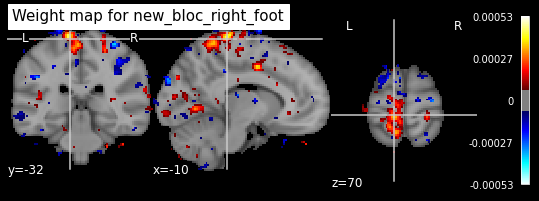

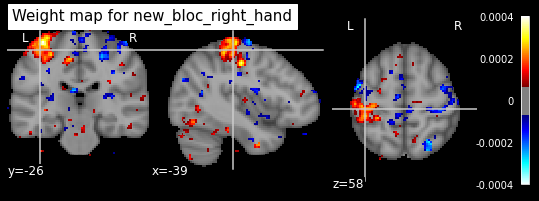

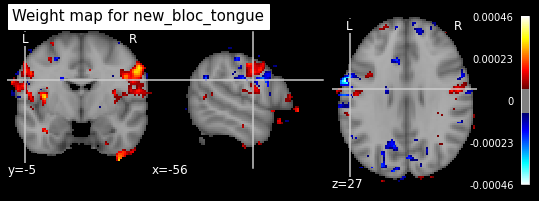

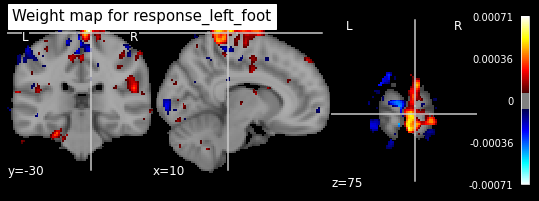

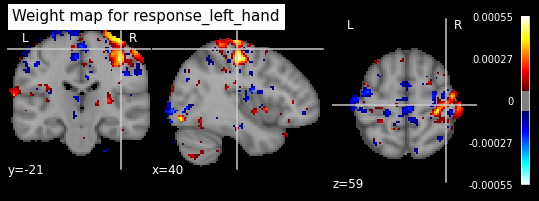

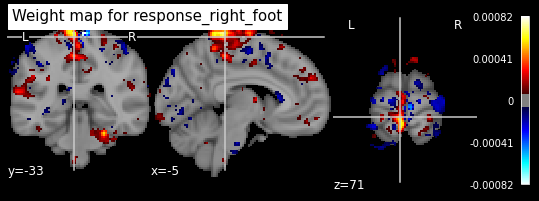

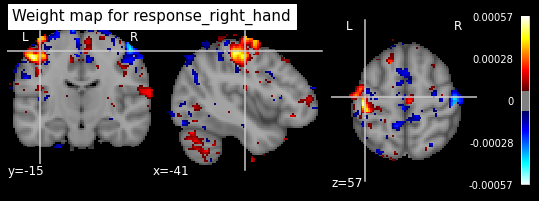

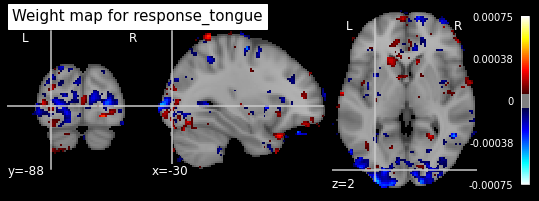

**Task: language**

presentation_math 0.9286764705882353
presentation_story 0.9529411764705882
question_math 0.8566176470588236
question_story 0.9176470588235294
response_math 0.9529411764705882
response_story 0.9272058823529411
mean value: 0.9226715686274508 



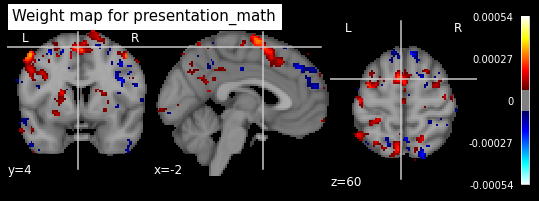

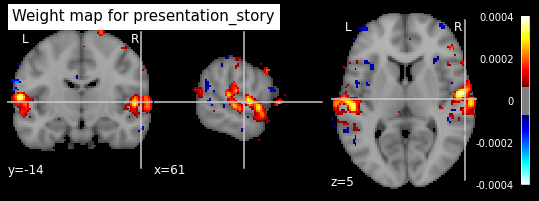

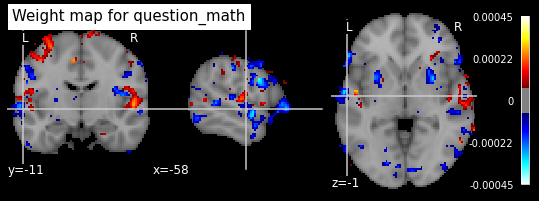

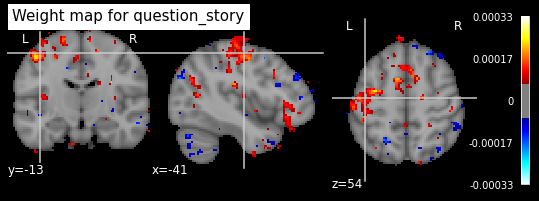

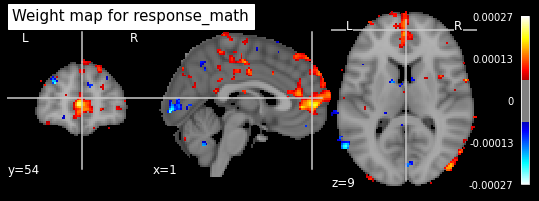

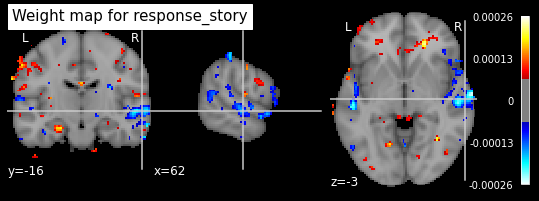

**Task: gambling**

Feedback 0.9066666666666666
Neutral 0.8
Punishment 0.7333333333333334
Reward 0.72
countdown 0.9199999999999999
mean value: 0.8160000000000001 



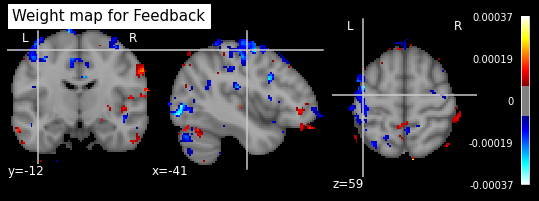

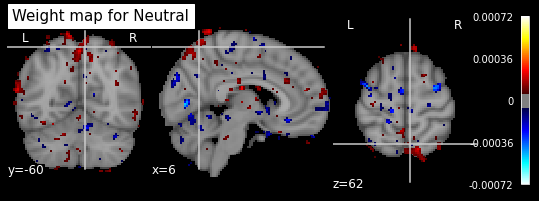

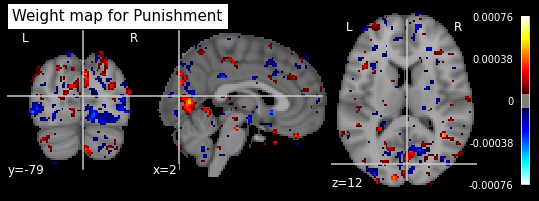

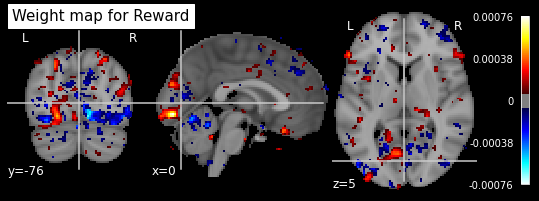

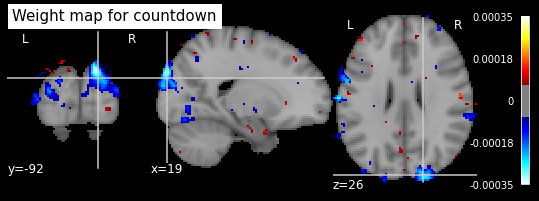

**Task: social**

Mental 0.9111111111111111
Random 0.9111111111111111
countdown 0.9555555555555555
mean value: 0.9259259259259259 



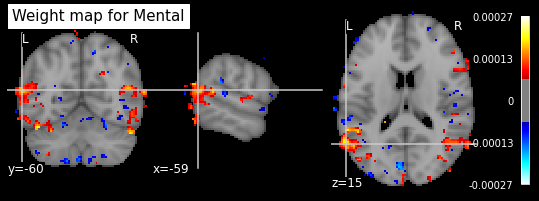

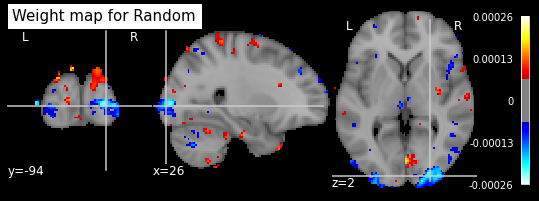

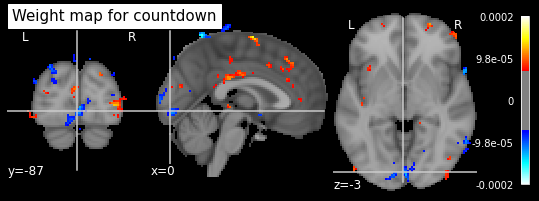

**Task: relational**

Control 0.9142857142857143
Relational 0.9000000000000001
countdown 0.9714285714285715
new_bloc_control 0.8571428571428571
new_bloc_relational 0.8571428571428571
mean value: 0.9 



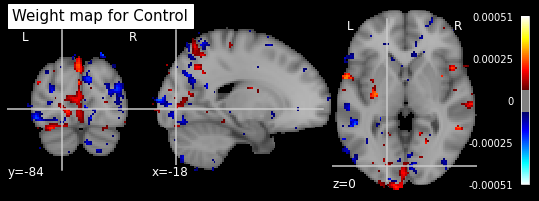

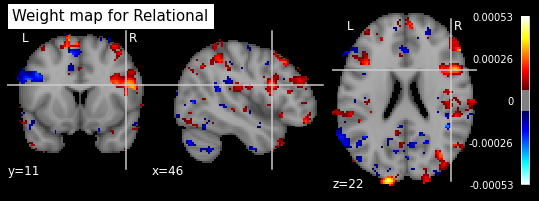

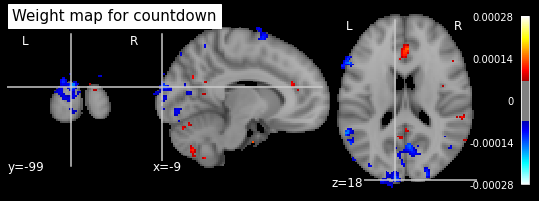

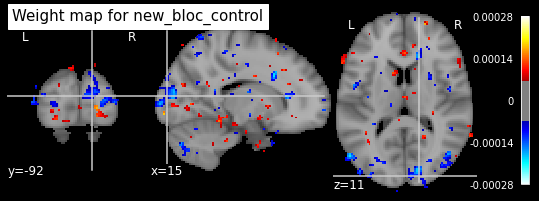

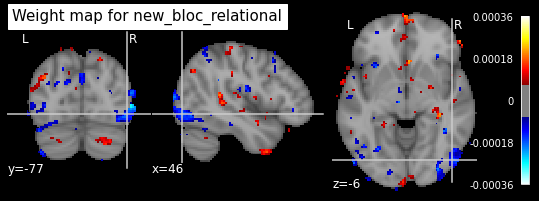

**Task: emotion**

countdown 0.9142857142857144
new_bloc_face 0.8714285714285713
new_bloc_shape 0.8857142857142858
response_face 0.9714285714285715
response_shape 0.8571428571428571
mean value: 0.9 



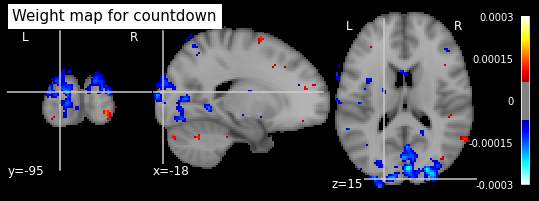

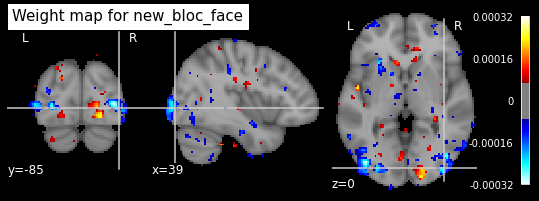

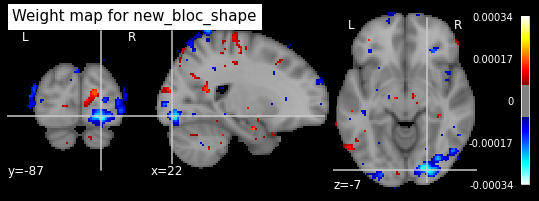

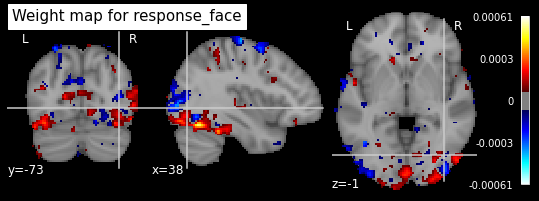

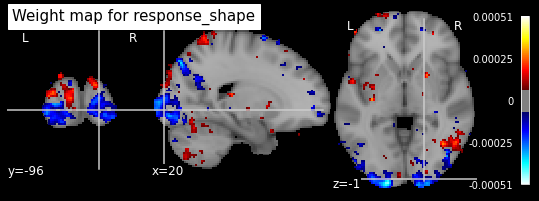

In [2]:
subj = 'sub-01'
path = '/home/SRastegarnia/hcptrt_decoding_Shima/DATA/cneuromod/hcptrt/sub-01/fmriprep-20.1.0/'
task_dir = '/home/SRastegarnia/hcptrt_decoding_Shima/hcptrt_decoding'

task_labels = ['wm', 'motor', 'language', 'gambling', 'social', 'relational', 'emotion']
# warnings.filterwarnings(action='once')
warnings.filterwarnings('ignore')

for task_label in task_labels:    
    
    mask_name = path + 'sub-01_ses-002_task-{}_run-2_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'.format(task_label)
    event_file = path + 'sub-01_ses-002_task-{}_run-02_events.tsv'.format(task_label)
    utils.printmd('**Task: {}**'.format(task_label))
    
    # # # to regress out the out of interest conditions
    # # conds = utils.conditions(event_file=event_file)
    
    df = utils.new_conditions(path, event_file, task_label)
    conds = list(set(df.trial_type))

    # Generate beta maps
    utils.postproc_task(subject=subj, task_label=task_label, conditions=conds, tpl_mask=mask_name)
    
    # Decoder
    utils.check_decoding(task_dir, task_label, mask_name)

### Results per single trial: